# Multipole and Local Expansions

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

Let's consider a potential. This one could look slightly familiar from a homework assignment.

In [2]:
nsources = 15
nxtgts = 400
nytgts = 400

angles = np.linspace(0, 2*np.pi, nsources, endpoint=False)
r = 1 + 0.3 * np.sin(3*angles)
sources = np.array([
    r*np.cos(angles),
    r*np.sin(angles),
    ])

charges = 0.5+2*np.sin(3*angles)

left, right, bottom, top = extent = (-2, 4, -4, 2)
targets = np.mgrid[left:right:nxtgts*1j, bottom:top:nytgts*1j]


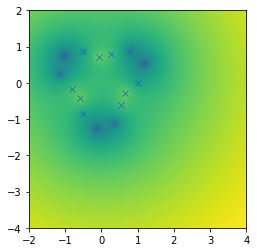

In [3]:
pt.plot(sources[0], sources[1], "x")

dist_vecs = sources.reshape(2, -1, 1, 1) - targets.reshape(2, 1, targets.shape[-1], -1)
dists = np.sqrt(np.sum(dist_vecs**2, axis=0))

potentials = np.sum(charges.reshape(-1, 1, 1) * np.log(dists), axis=0)
pt.imshow(potentials.T[::-1], extent=extent)

Now let's create a stash of derivatives, all about a center of 0, to make things easier:

In [4]:
def f(arg):
    return np.log(np.sqrt(np.sum(arg**2, axis=0)))

def fdx(arg):
    x, y = arg
    r2 = np.sum(arg**2, axis=0)
    return x/r2

def fdy(arg):
    x, y = arg
    r2 = np.sum(arg**2, axis=0)
    return y/r2

def fdxx(arg):
    x, y = arg
    r2 = np.sum(arg**2, axis=0)
    return 1/r2 - 2*x**2/r2**2

def fdyy(arg):
    x, y = arg
    r2 = np.sum(arg**2, axis=0)
    return 1/r2 - 2*y**2/r2**2

def fdxy(arg):
    x, y = arg
    r2 = np.sum(arg**2, axis=0)
    return - 2*x*y/r2**2

## Local expansions

In [24]:
center = np.array([1.5, -1])
#center = np.array([2, -2])
#center = np.array([3, -3])
#center = np.array([0, 0])


In [25]:
expn = 0

for isrc in range(nsources):
    a = sources[:, isrc] - center
    hx, hy = center.reshape(-1, 1, 1) - targets
    expn += charges[isrc]*(
        f(a)
        + fdx(a)*hx
        + fdy(a)*hy
        + fdxx(a)*hx**2/2
        + fdxy(a)*hx*hy
        + fdyy(a)*hy**2/2
        )

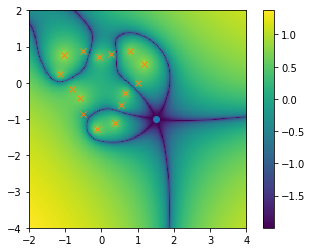

In [26]:
err = expn - potentials
pt.plot(center[0], center[1], "o")
pt.plot(sources[0], sources[1], "x")
pt.imshow(np.log10(1e-2 + np.abs(err.T[::-1])), extent=extent)
pt.colorbar()

* Move the center around, see how the errors change
* Reduce to linears, see how the errors change

## Multipole expansions

In [16]:
center = np.array([0, 0])
# center = np.array([1, 0])

In [17]:
expn = 0

for isrc in range(nsources):

    a = targets - center.reshape(-1, 1, 1)

    hx, hy = center - sources[:, isrc]

    expn += charges[isrc]*(

        f(a)
        + fdx(a)*hx
        + fdy(a)*hy
        + fdxx(a)*hx**2/2
        + fdxy(a)*hx*hy
        + fdyy(a)*hy**2/2
        )

/home/andreas/src/env-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/andreas/src/env-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/home/andreas/src/env-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
/home/andreas/src/env-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
/home/andreas/src/env-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/home/andreas/src/env-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/andreas/src/env-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/home/an

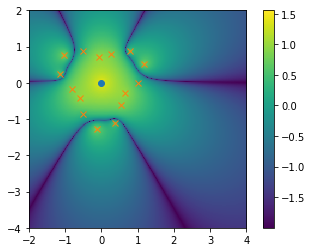

In [18]:
err = expn - potentials
pt.plot(center[0], center[1], "o")
pt.plot(sources[0], sources[1], "x")
pt.imshow(np.log10(1e-2 + np.abs(err.T[::-1])), extent=extent)
pt.colorbar()

* Move the center around, observe convergence behavior
* Reduce to linears, observe convergence behavior

Look at individual basis functions:

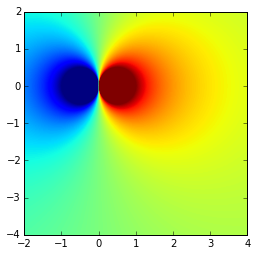

In [115]:
pt.imshow(
    fdx(targets).T[::-1],
    extent=extent, vmin=-1, vmax=1)

Why is this thing called a 'multipole' expansion?